In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,fbeta_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_imp = pd.read_csv("C:\\Users\\cheta\\Downloads\\knn_imputation.csv")
df_imp.head(4)

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0


In [7]:
df_imp.isnull().sum()

Unnamed: 0           0
Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [8]:
scaler = MinMaxScaler()

In [10]:
df_imp = pd.DataFrame(scaler.fit_transform(df_imp), columns = df_imp.columns)
df_imp.head(4)

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000000,1.0,0.112821,0.129791,0.081464,0.003106,0.065427,0.027847
1,0.003759,1.0,0.062774,0.131890,0.103097,0.028548,0.080590,0.036984
2,0.007519,1.0,0.056495,0.118232,NaN,0.039116,0.086052,0.163559
3,0.011278,1.0,0.118136,0.014476,0.045464,0.104842,0.012346,0.037234


In [13]:
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df_imp),columns=df_imp.columns)

In [14]:
df_imp.head(4)

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000000,1.0,0.112821,0.129791,0.081464,0.003106,0.065427,0.027847
1,0.003759,1.0,0.062774,0.131890,0.103097,0.028548,0.080590,0.036984
2,0.007519,1.0,0.056495,0.118232,0.110525,0.039116,0.086052,0.163559
3,0.011278,1.0,0.118136,0.014476,0.045464,0.104842,0.012346,0.037234


In [16]:
df_imp.isna().sum()

Unnamed: 0          0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [132]:
churn = pd.read_csv("C:\\Users\\cheta\\Downloads\\Churn.csv")

In [133]:
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [134]:
churn.isna().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Intl Plan         0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

In [135]:
churn.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:>

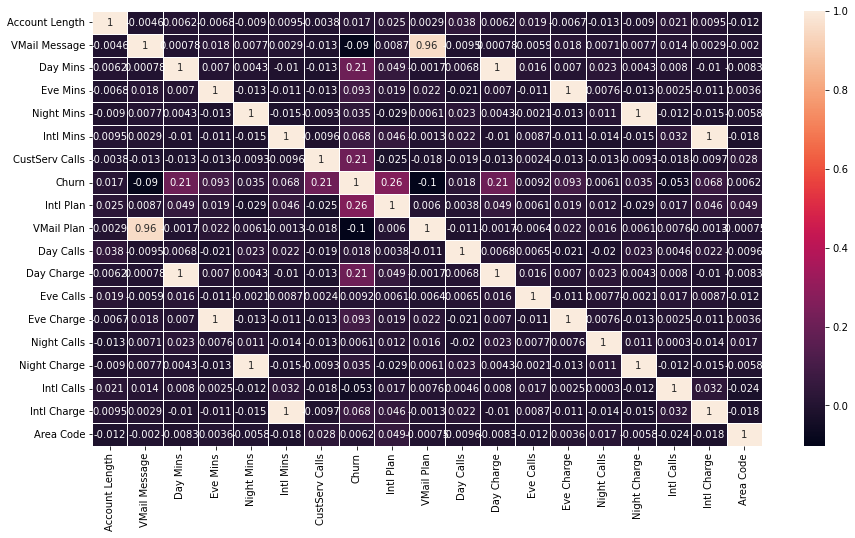

In [136]:
plt.figure(figsize=(15,8))
sns.heatmap(churn.corr(),annot=True,linewidth=0.8)

In [137]:
cols = ["Day Mins","Eve Mins","Intl Plan","VMail Message"]

In [138]:
y = churn["Churn"]
X = churn[cols]

In [139]:
X_train_cv, x_test, y_train_cv, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [140]:
X_train_cv.shape

(2333, 4)

In [141]:
x_test.shape

(1000, 4)

In [142]:
X_train,x_val,y_train,y_val = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=42)

In [143]:
error = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(x_val)
    error.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

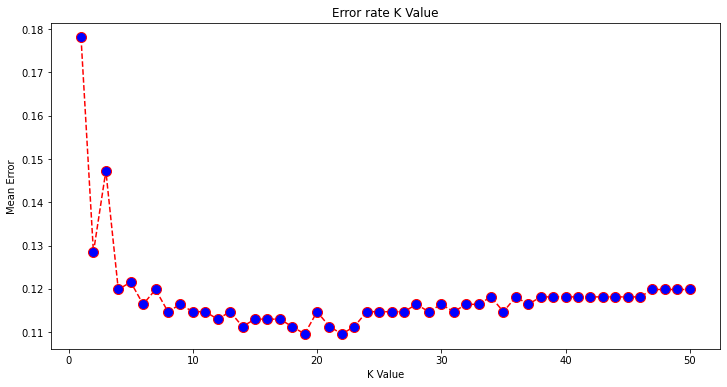

In [144]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error rate K Value")
plt.xlabel('K Value')
plt.ylabel("Mean Error")

In [145]:
knn = KNeighborsClassifier(n_neighbors=19,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [146]:
y_pred = knn.predict(x_test)
knn.score(x_test,y_test)

0.902

In [147]:
cm = confusion_matrix(y_test,y_pred,labels=knn.classes_)

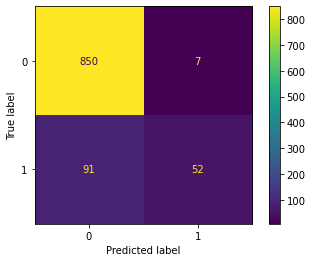

In [148]:
disp = ConfusionMatrixDisplay(cm,display_labels = knn.classes_)
disp.plot()

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       857
           1       0.88      0.36      0.51       143

    accuracy                           0.90      1000
   macro avg       0.89      0.68      0.73      1000
weighted avg       0.90      0.90      0.88      1000



In [150]:
fbeta_score(y_test,y_pred,beta=0.5)

0.6860158311345647

In [151]:
fbeta_score(y_test, y_pred, beta = 2)

0.4120443740095087

In [152]:
train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.0
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train,y_train)
    train_y_predict = scaled_lr.predict(X_train)
    val_y_pred = scaled_lr.predict(x_val)
    train_score = f1_score(y_train,train_y_predict)
    val_score = f1_score(y_val,val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

C:\Users\cheta\AppData\Local\Temp\ipykernel_25132\1021547414.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))


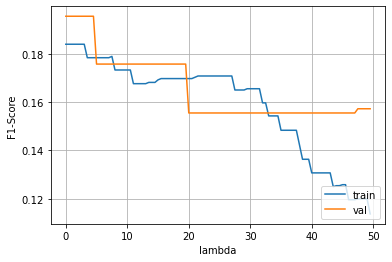

In [153]:
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [154]:
train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.0
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la,class_weight=({0:1,1:6}) ))
    scaled_lr.fit(X_train,y_train)
    train_y_predict = scaled_lr.predict(X_train)
    val_y_pred = scaled_lr.predict(x_val)
    train_score = f1_score(y_train,train_y_predict)
    val_score = f1_score(y_val,val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

C:\Users\cheta\AppData\Local\Temp\ipykernel_25132\2237893412.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la,class_weight=({0:1,1:6}) ))


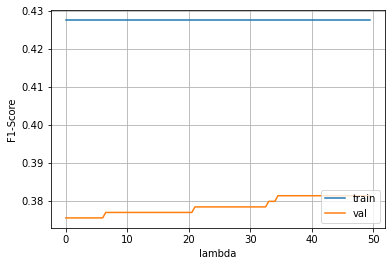

In [155]:
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [156]:
best_index = np.argmax(val_scores)
print(val_scores[best_index])

0.38132295719844356


In [157]:
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:1, 1:6 }))
scaled_lr.fit(X_train, y_train)

y_pred_test = scaled_lr.predict(x_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.4332603938730853


In [158]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       857
           1       0.32      0.69      0.43       143

    accuracy                           0.74      1000
   macro avg       0.63      0.72      0.63      1000
weighted avg       0.85      0.74      0.78      1000



In [125]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [126]:
smt = SMOTE(sampling_strategy=0.5)

In [127]:
x_sm, y_sm = smt.fit_resample(X_train,y_train)

In [161]:
print(f"Resampled datase shape {Counter(y_sm)}")

Resampled datase shape Counter({0: 1487, 1: 743})


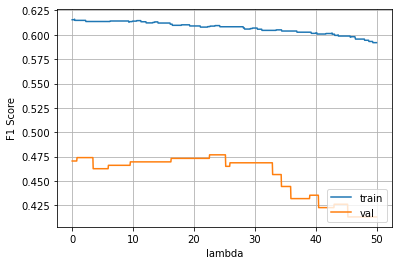

In [164]:
train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.05

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(x_sm, y_sm)
  train_score = f1_score(y_sm, scaled_lr.predict(x_sm))
  val_score = f1_score(y_val, scaled_lr.predict(x_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

In [168]:
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(x_sm, y_sm)

y_pred_test = scaled_lr.predict(x_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.6090225563909776


In [169]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       857
           1       0.66      0.57      0.61       143

    accuracy                           0.90      1000
   macro avg       0.79      0.76      0.77      1000
weighted avg       0.89      0.90      0.89      1000



In [170]:
f2 = fbeta_score(y_test,y_pred_test,beta=2)
f0 = fbeta_score(y_test,y_pred_test,beta=0.5)

In [171]:
print(f2, f0)

0.5827338129496403 0.6377952755905512
